In [3]:
import numpy as np
import pandas as pd
import numpy as np
import csv
train=pd.read_csv('C:/Users/Maya/Desktop/perfect3.csv', encoding = 'GBK')
data = train.append(train, ignore_index = True)
print('合并后数据集: ', data.shape)

合并后数据集:  (15734, 37)


In [4]:
data.head()

,Unnamed: 0,案件名称,几审,法院所属省市,法院所属省,法官姓名,法官性别预测,法官女性,预测精度(朴素贝叶斯),判决时间,...,自首,谅解,无证驾驶,酒驾犯罪史,拘役(单位：天，一个月按30天计),拘役,有期徒刑（单位：月）,是否有缓刑,缓刑（单位：月）,罚金(单位：元)
0,2.0,1028杨兆理危险驾驶罪一审刑事判决书,一审,江苏省苏州市,江苏省,蒋耀华,男,0.0,0.918916,2019/12/10,...,0.0,0.0,0.0,0.0,30.0,1m,NaN,1.0,3,1000.0
1,3.0,103陆佩华危险驾驶罪一审刑事判决书,一审,江苏省南通市,江苏省,吴中伟,男,0.0,0.973460,2018/03/07,...,0.0,0.0,0.0,0.0,45.0,1m15d,NaN,1.0,2,2000.0
2,4.0,1043王五军危险驾驶罪一审刑事判决书,一审,江苏省苏州市,江苏省,蒋耀华,男,0.0,0.918916,2019/12/11,...,0.0,0.0,0.0,0.0,30.0,1m,NaN,0.0,无,1000.0
3,5.0,104李永龙危险驾驶罪一审刑事判决书,一审,江苏省南通市,江苏省,吴中伟,男,0.0,0.973460,2018/03/07,...,0.0,0.0,0.0,0.0,60.0,2m,NaN,0.0,无,2000.0
4,6.0,105陆沈俭危险驾驶罪一审刑事判决书,一审,江苏省南通市,江苏省,吴中伟,男,0.0,0.973460,2018/03/07,...,0.0,0.0,0.0,0.0,60.0,2m,NaN,1.0,4,2000.0


In [5]:
df = pd.DataFrame(data)

In [6]:
data.describe()

,Unnamed: 0,法官女性,预测精度(朴素贝叶斯),少数民族,女性,年龄,血液乙醇浓度(单位:mg/100ml),如实供述,认罪认罚,顶替,...,伤亡情况,全部责任,自首,谅解,无证驾驶,酒驾犯罪史,拘役(单位：天，一个月按30天计),有期徒刑（单位：月）,是否有缓刑,罚金(单位：元)
count,15728.000000,15728.000000,15728.000000,15728.000000,15728.000000,15550.000000,15728.000000,15728.000000,15728.000000,15728.00000,...,15728.000000,15728.000000,15728.000000,15728.000000,15728.000000,15728.000000,15678.000000,54.000000,15728.00000,15728.000000
mean,3931.500000,0.348169,0.847104,0.089013,0.027467,38.907653,160.459285,0.867497,0.956256,0.00674,...,0.017548,0.202950,0.224949,0.109741,0.197482,0.029247,55.506315,13.018519,0.53090,3627.390768
std,2270.213412,0.476405,0.140151,0.284772,0.163445,9.841353,53.082909,0.339047,0.204531,0.08182,...,0.131307,0.402208,0.417562,0.312576,0.398112,0.168504,26.004478,11.783008,0.49906,2840.682945
min,0.000000,0.000000,0.500621,0.000000,0.000000,18.000000,80.200000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,6.000000,0.00000,0.000000
25%,1965.750000,0.000000,0.762066,0.000000,0.000000,31.000000,118.300000,1.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,6.625000,0.00000,2000.000000
50%,3931.500000,0.000000,0.897614,0.000000,0.000000,38.000000,153.000000,1.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,8.000000,1.00000,3000.000000
75%,5897.250000,1.000000,0.962162,0.000000,0.000000,46.000000,192.000000,1.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,12.000000,1.00000,5000.000000
max,7863.000000,1.000000,0.998452,1.000000,1.000000,74.000000,550.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,180.000000,54.000000,1.00000,36000.000000


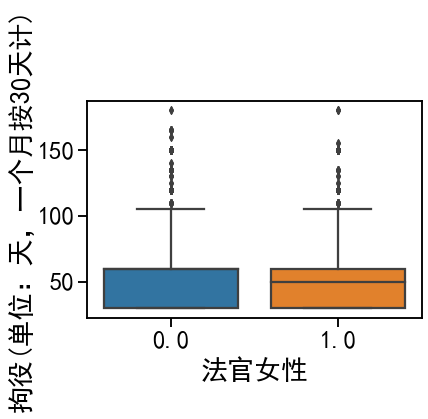

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

sns.boxplot(x = '法官女性', y ='拘役(单位：天，一个月按30天计)', data = data)

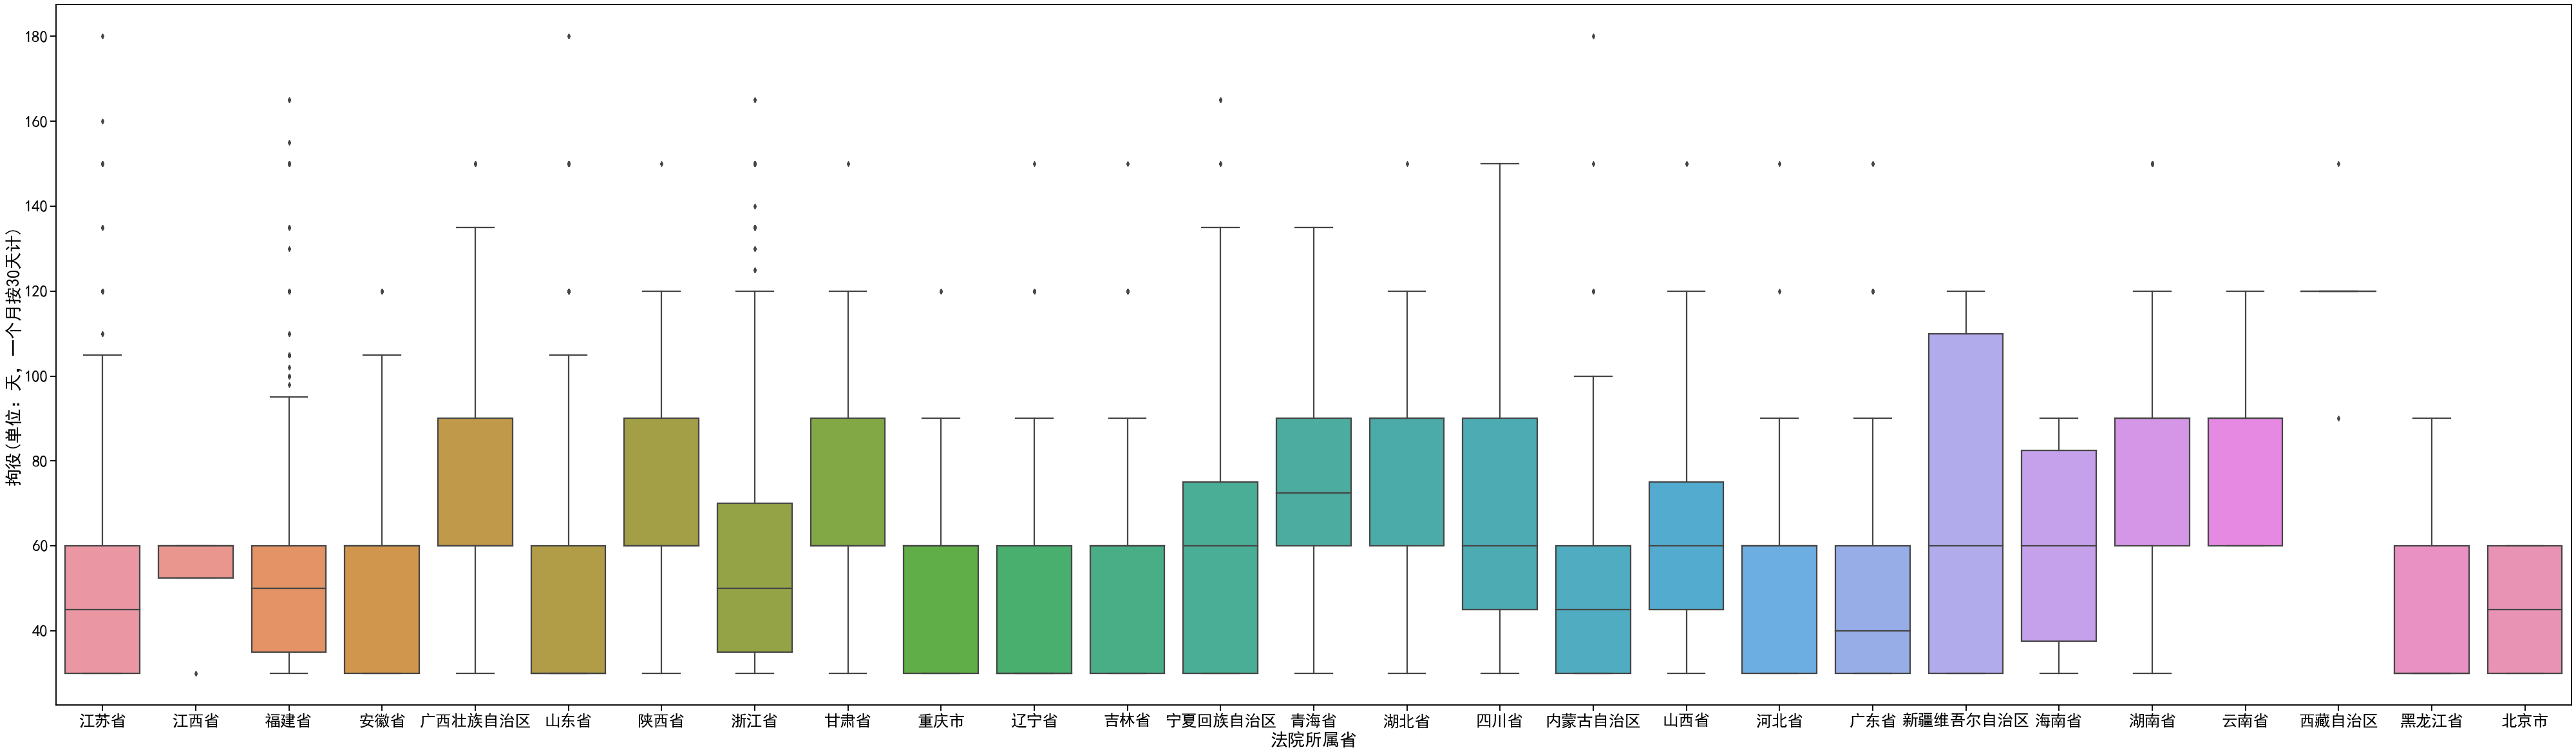

In [19]:

plt.figure(figsize=(70, 20))
sns.set_context("talk",font_scale=1.5)
sns.boxplot(x = '法院所属省', y ='拘役(单位：天，一个月按30天计)', data = data)

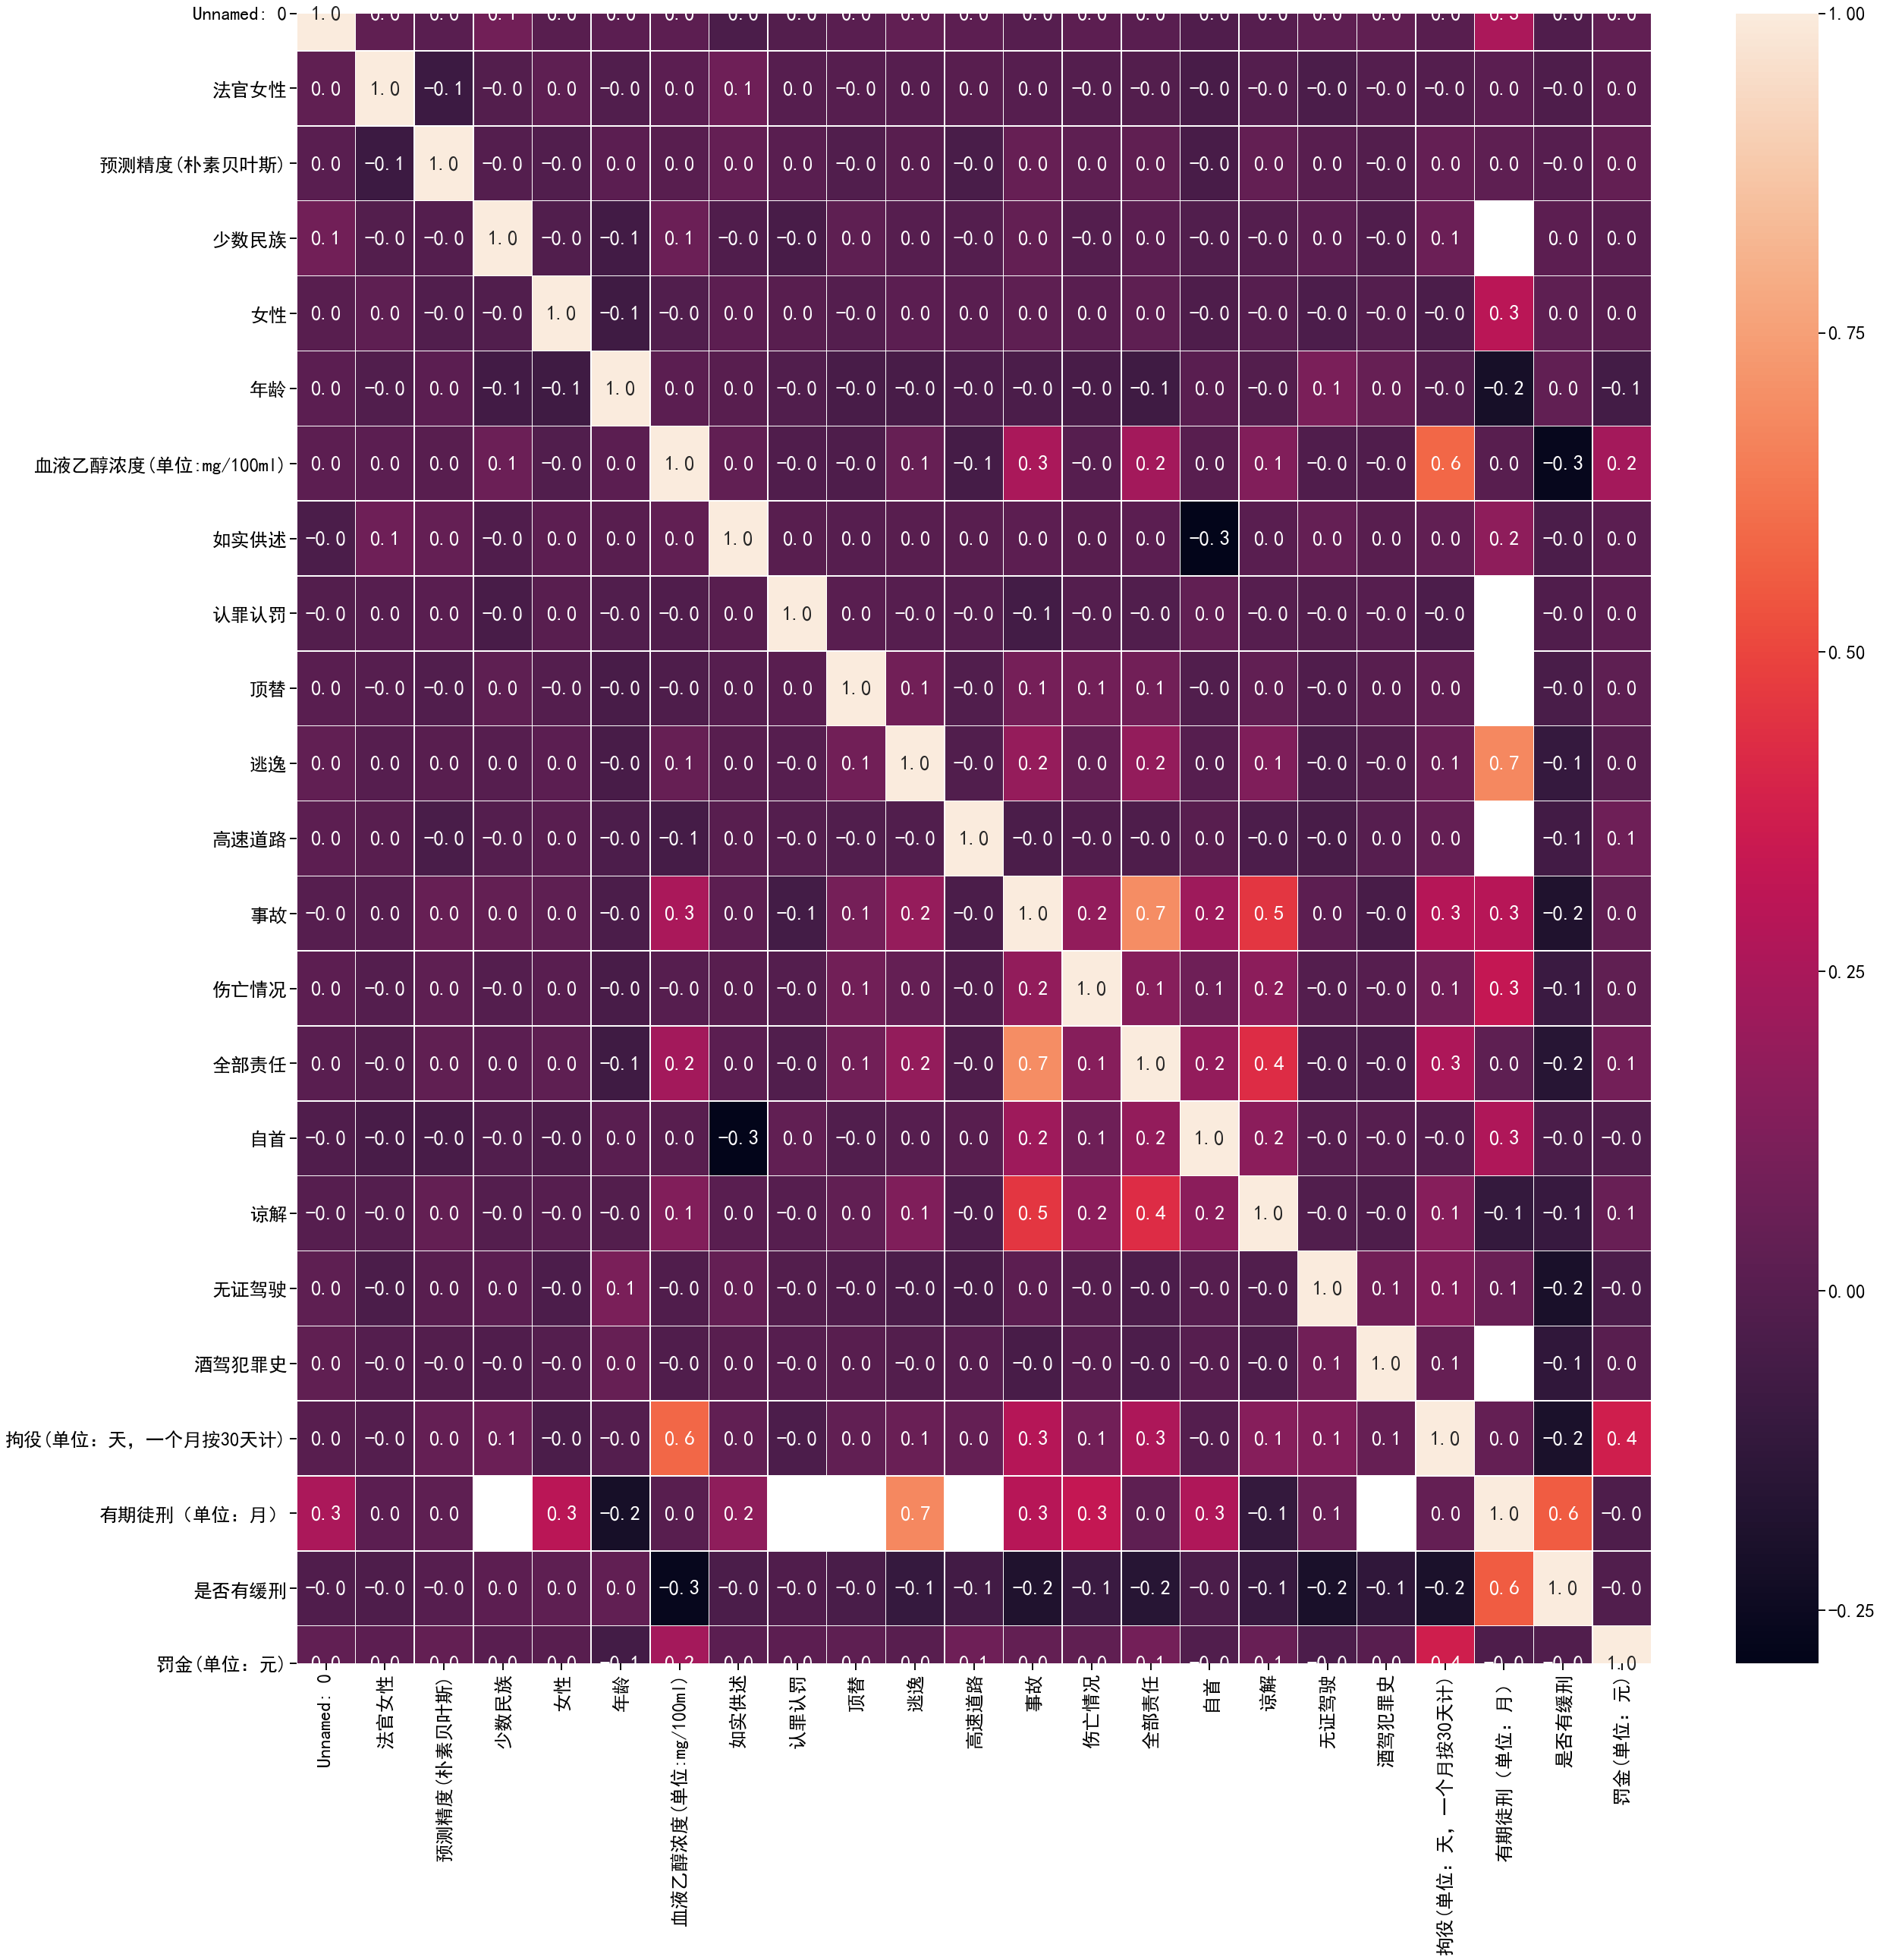

In [23]:
plt.figure(figsize=(40, 40))
sns.heatmap(data.corr(), annot = True, linewidths = 0.5, fmt = '.1f')

In [148]:
data.isnull().sum()

Unnamed: 0                 6
案件名称                       6
几审                         6
法院所属省市                     6
法院所属省                      6
法官姓名                       6
法官性别预测                     6
法官女性                       6
预测精度(朴素贝叶斯)                6
判决时间                       6
民族                         6
少数民族                       6
性别                         6
女性                         6
学历                         6
户籍所在省份                     6
出生时间                     184
年龄                       184
血液乙醇浓度(单位:mg/100ml)        6
如实供述                       6
认罪认罚                       6
顶替                         6
逃逸                         6
高速道路                       6
事故                         6
伤亡情况                       6
全部责任                       6
自首                         6
谅解                         6
无证驾驶                       6
酒驾犯罪史                      6
拘役(单位：天，一个月按30天计)         56
拘役                        56
有期徒刑（单位：月）             15680
是否有缓刑         

In [72]:
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,案件名称,几审,法院所属省市,法院所属省,法官姓名,法官性别预测,法官女性,预测精度(朴素贝叶斯),判决时间,...,自首,谅解,无证驾驶,酒驾犯罪史,拘役(单位：天，一个月按30天计),拘役,有期徒刑（单位：月）,是否有缓刑,缓刑（单位：月）,罚金(单位：元)
0,2.0,1028杨兆理危险驾驶罪一审刑事判决书,一审,江苏省苏州市,江苏省,蒋耀华,男,0.0,0.918916,2019/12/10,...,0.0,0.0,0.0,0.0,30.0,1m,NaN,1.0,3,1000.0
1,3.0,103陆佩华危险驾驶罪一审刑事判决书,一审,江苏省南通市,江苏省,吴中伟,男,0.0,0.973460,2018/03/07,...,0.0,0.0,0.0,0.0,45.0,1m15d,NaN,1.0,2,2000.0
2,4.0,1043王五军危险驾驶罪一审刑事判决书,一审,江苏省苏州市,江苏省,蒋耀华,男,0.0,0.918916,2019/12/11,...,0.0,0.0,0.0,0.0,30.0,1m,NaN,0.0,无,1000.0
3,5.0,104李永龙危险驾驶罪一审刑事判决书,一审,江苏省南通市,江苏省,吴中伟,男,0.0,0.973460,2018/03/07,...,0.0,0.0,0.0,0.0,60.0,2m,NaN,0.0,无,2000.0
4,6.0,105陆沈俭危险驾驶罪一审刑事判决书,一审,江苏省南通市,江苏省,吴中伟,男,0.0,0.973460,2018/03/07,...,0.0,0.0,0.0,0.0,60.0,2m,NaN,1.0,4,2000.0


In [73]:
data['法官女性'].dropna(axis=0)
data['拘役(单位：天，一个月按30天计)'].dropna(axis=0)
Female=[]
for s in range(0,len(df)):
    if data['法官女性'][s]==1:
        Female.append(data["拘役(单位：天，一个月按30天计)"][s])
print(Female)

[30.0, 30.0, 30.0, 30.0, 30.0, 60.0, 30.0, 90.0, 60.0, 30.0, 30.0, 40.0, 90.0, 60.0, 60.0, 35.0, 45.0, 90.0, 30.0, 90.0, 60.0, 90.0, 60.0, 30.0, 60.0, 45.0, 45.0, 30.0, 120.0, 40.0, 40.0, 60.0, 30.0, 30.0, 70.0, 80.0, 30.0, 90.0, 90.0, 105.0, 30.0, 30.0, 60.0, 90.0, 30.0, 45.0, 60.0, 50.0, 40.0, 75.0, 60.0, 50.0, 30.0, 105.0, 40.0, 45.0, 30.0, 30.0, 30.0, 90.0, 90.0, 35.0, 30.0, 45.0, 45.0, 30.0, 50.0, 30.0, 40.0, 30.0, 50.0, 30.0, 50.0, 45.0, 30.0, 40.0, 50.0, 45.0, 50.0, 80.0, 30.0, 45.0, 70.0, 90.0, 30.0, 45.0, 30.0, 110.0, 30.0, 60.0, 30.0, 105.0, 60.0, 75.0, 90.0, 45.0, 60.0, 30.0, 60.0, 40.0, 30.0, 90.0, 30.0, 60.0, 60.0, 80.0, 60.0, 30.0, 30.0, 75.0, 45.0, 35.0, 30.0, 105.0, 60.0, 75.0, 35.0, 30.0, 30.0, 30.0, 45.0, 60.0, 60.0, 45.0, 60.0, 30.0, 45.0, 75.0, 60.0, 45.0, 105.0, 30.0, 30.0, 45.0, 30.0, 30.0, 30.0, 50.0, 60.0, 60.0, 50.0, 75.0, 60.0, 50.0, 50.0, 30.0, 40.0, 30.0, 30.0, 30.0, 105.0, 30.0, 30.0, 60.0, 45.0, 30.0, 30.0, 60.0, 30.0, 50.0, 30.0, 40.0, 75.0, 30.0, 120.0, 

In [74]:
Female= [Female_ for Female_ in Female if Female_ == Female_]
F=np.asarray(Female)
F_mean=np.mean(F)
F_var=np.var(F)
F_std=np.std(F)
print("平均值为：%f" % F_mean)
print("方差为：%f" % F_var)
print("标准差为:%f" % F_std)

平均值为：55.303630
方差为：665.012319
标准差为:25.787833


In [75]:
data['拘役(单位：天，一个月按30天计)'].min()

30.0

In [76]:
data['拘役(单位：天，一个月按30天计)'].max()

180.0

In [77]:
list1=[]
for i in range (30,181,5):
    listi = [i,0]
    for j in range(0,15728):
        if data["法官女性"][j] == 1:
            if data["拘役(单位：天，一个月按30天计)"][j]<=i:
                if data["拘役(单位：天，一个月按30天计)"][j]>=i-5:
                    listi[1] +=1 
    list1.append(listi)
print(list1)
print(len(list1))

[[30, 1735], [35, 1789], [40, 278], [45, 797], [50, 757], [55, 196], [60, 1369], [65, 1375], [70, 96], [75, 352], [80, 332], [85, 64], [90, 552], [95, 544], [100, 12], [105, 84], [110, 92], [115, 20], [120, 154], [125, 156], [130, 4], [135, 12], [140, 10], [145, 0], [150, 50], [155, 52], [160, 2], [165, 0], [170, 0], [175, 0], [180, 4]]
31


In [78]:
from pandas.core.frame import DataFrame
d=DataFrame(list1)
print(d)

      0     1
0    30  1735
1    35  1789
2    40   278
3    45   797
4    50   757
5    55   196
6    60  1369
7    65  1375
8    70    96
9    75   352
10   80   332
11   85    64
12   90   552
13   95   544
14  100    12
15  105    84
16  110    92
17  115    20
18  120   154
19  125   156
20  130     4
21  135    12
22  140    10
23  145     0
24  150    50
25  155    52
26  160     2
27  165     0
28  170     0
29  175     0
30  180     4


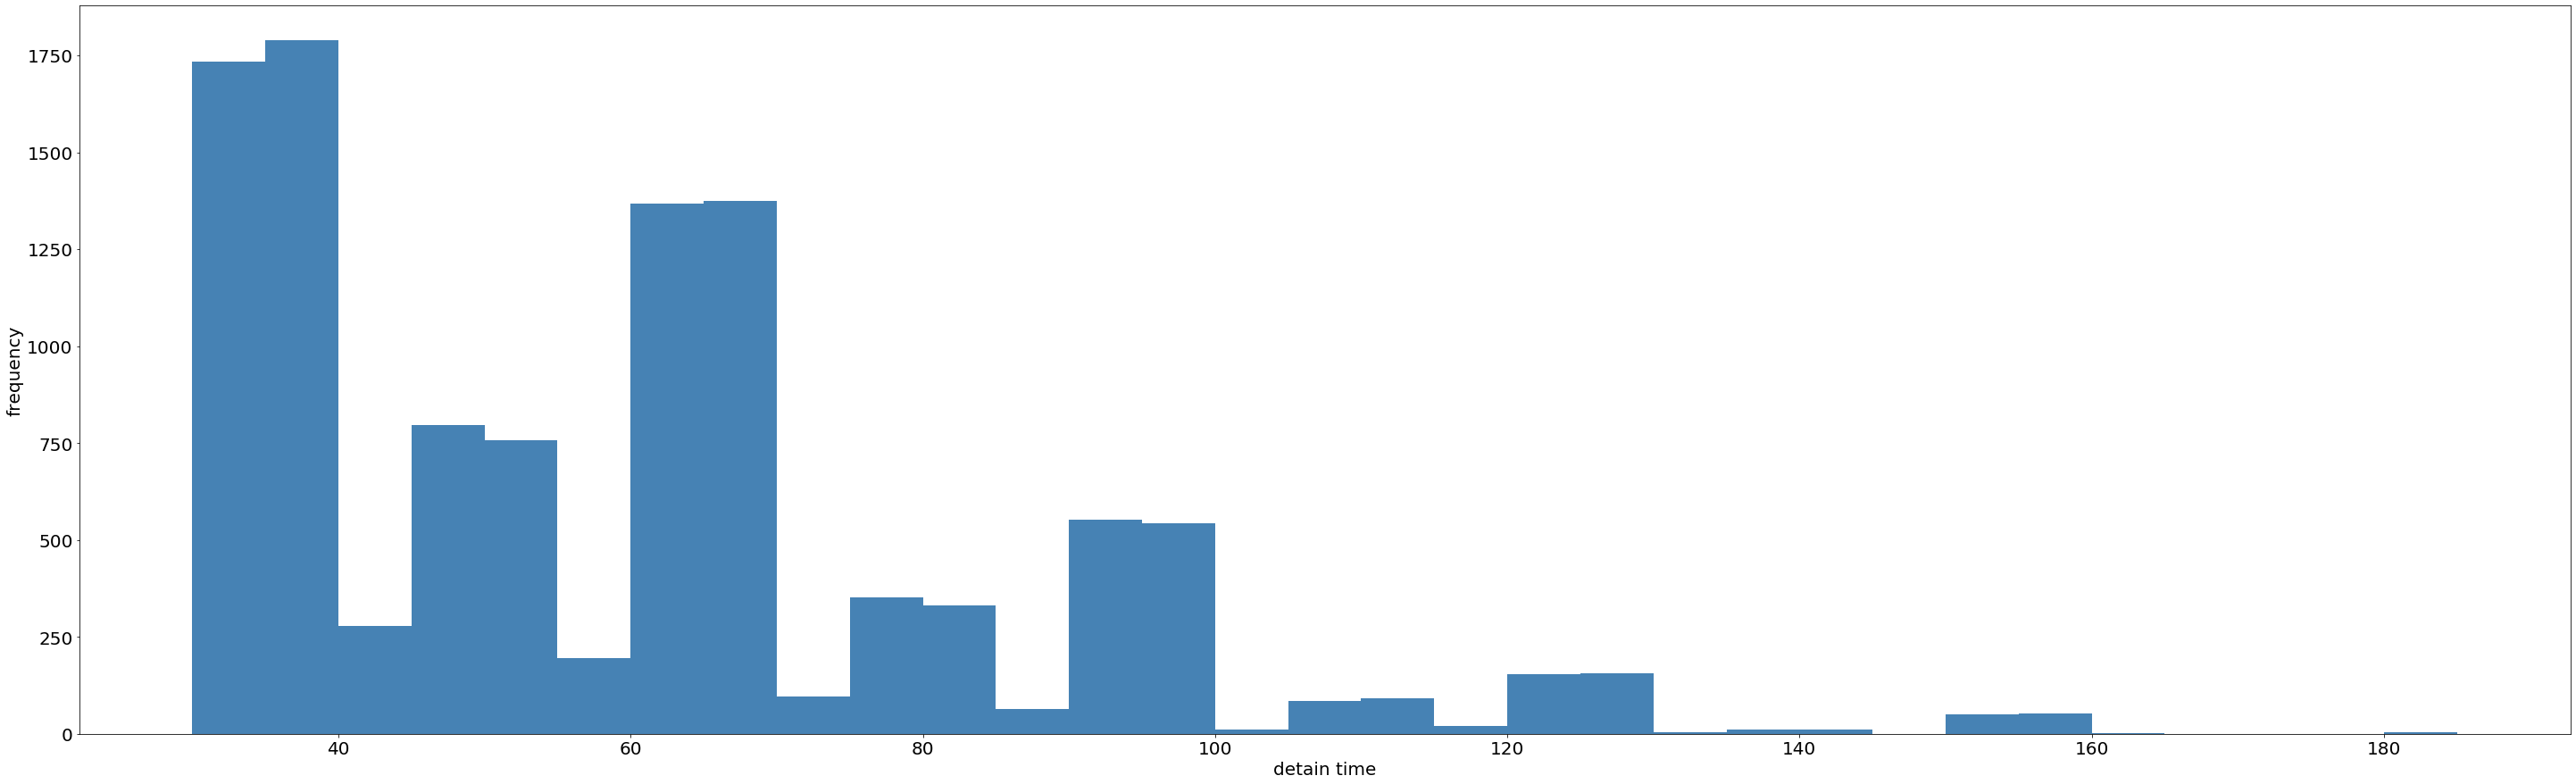

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,15))
x=d[0].values
y=d[1].values
plt.bar(x,y,color='steelblue',width = 5,align='edge')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('detain time', fontsize=20)
plt.ylabel('frequency', fontsize=20)
plt.show()

In [82]:
Male=[]
for s in range(0,len(df)):
    if data['法官女性'][s]==0:
        Male.append(data["拘役(单位：天，一个月按30天计)"][s])
print(Male)

[30.0, 45.0, 30.0, 60.0, 60.0, 45.0, 30.0, 30.0, 30.0, 120.0, 30.0, 90.0, 60.0, 30.0, 150.0, 30.0, 60.0, 90.0, 30.0, 90.0, 90.0, 60.0, 120.0, 120.0, 75.0, 60.0, 90.0, 30.0, 30.0, 30.0, 30.0, 30.0, 45.0, 60.0, 150.0, 30.0, 60.0, 60.0, 30.0, 30.0, 75.0, 30.0, 30.0, 60.0, 30.0, 45.0, 30.0, 75.0, 30.0, 60.0, 60.0, 90.0, 30.0, 60.0, 60.0, 60.0, 30.0, 60.0, 60.0, 60.0, 30.0, 30.0, 120.0, 30.0, 60.0, 60.0, 30.0, 45.0, 105.0, 30.0, 30.0, 30.0, 30.0, 90.0, 30.0, 30.0, 30.0, 30.0, 45.0, 60.0, 30.0, 30.0, 30.0, 90.0, 45.0, 30.0, 60.0, 30.0, 45.0, 35.0, 100.0, 45.0, 35.0, 90.0, 60.0, 60.0, 90.0, 60.0, 150.0, 60.0, 75.0, 45.0, 60.0, 150.0, 150.0, 35.0, 60.0, 60.0, 90.0, 60.0, 60.0, 60.0, 45.0, 30.0, 60.0, 45.0, 60.0, 30.0, 60.0, 60.0, 30.0, 60.0, 60.0, 90.0, 60.0, 60.0, 60.0, 60.0, 70.0, 45.0, 90.0, 45.0, 60.0, 60.0, 150.0, 30.0, 60.0, 30.0, 120.0, 60.0, 90.0, 60.0, 60.0, 90.0, 90.0, 30.0, 30.0, 30.0, 45.0, 60.0, 30.0, 90.0, 30.0, 120.0, 60.0, 60.0, 30.0, 60.0, 65.0, 40.0, 90.0, 90.0, 75.0, 75.0, 7

In [83]:
Male= [Male_ for Male_ in Male if Male_ == Male_]
M=np.asarray(Male)
M_mean=np.mean(M)
M_var=np.var(M)
M_std=np.std(M)
print("平均值为：%f" % M_mean)
print("方差为：%f" % M_var)
print("标准差为:%f" % M_std)

平均值为：55.614437
方差为：682.118751
标准差为:26.117403


In [86]:
list2=[]
for i in range (30,181,5):
    listi = [i,0]
    for j in range(0,15728):
        if data["法官女性"][j] == 0:
            if data["拘役(单位：天，一个月按30天计)"][j]<=i:
                if data["拘役(单位：天，一个月按30天计)"][j]>=i-5:
                    listi[1] +=1 
    list2.append(listi)
print(list2)
print(len(list2))

[[30, 3286], [35, 3386], [40, 446], [45, 1434], [50, 1340], [55, 272], [60, 2722], [65, 2742], [70, 168], [75, 576], [80, 488], [85, 56], [90, 1130], [95, 1122], [100, 42], [105, 146], [110, 128], [115, 16], [120, 328], [125, 330], [130, 6], [135, 30], [140, 28], [145, 2], [150, 88], [155, 88], [160, 2], [165, 14], [170, 12], [175, 0], [180, 2]]
31


In [87]:
from pandas.core.frame import DataFrame
e=DataFrame(list2)
print(e)

      0     1
0    30  3286
1    35  3386
2    40   446
3    45  1434
4    50  1340
5    55   272
6    60  2722
7    65  2742
8    70   168
9    75   576
10   80   488
11   85    56
12   90  1130
13   95  1122
14  100    42
15  105   146
16  110   128
17  115    16
18  120   328
19  125   330
20  130     6
21  135    30
22  140    28
23  145     2
24  150    88
25  155    88
26  160     2
27  165    14
28  170    12
29  175     0
30  180     2


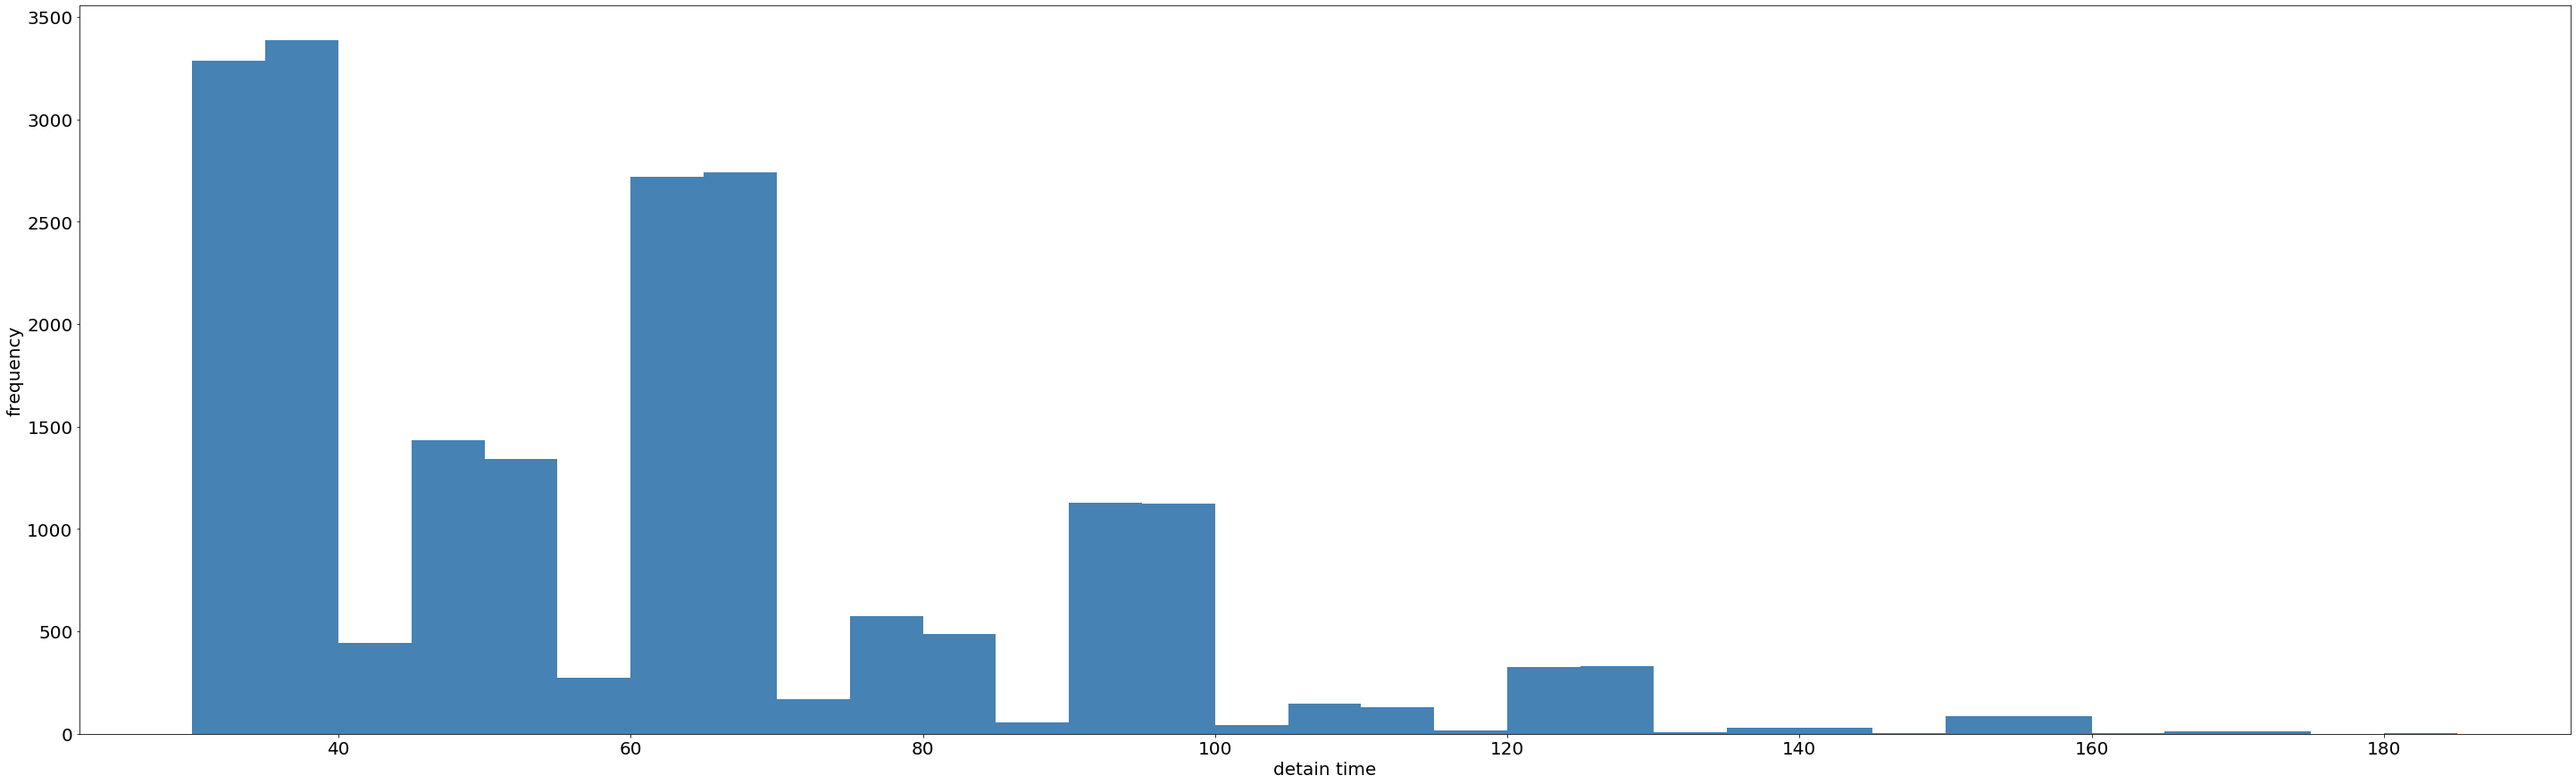

In [88]:
plt.figure(figsize=(50,15))
x=e[0].values
y=e[1].values
plt.bar(x,y,color='steelblue',width = 5,align='edge')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('detain time', fontsize=20)
plt.ylabel('frequency', fontsize=20)
plt.show()

In [132]:
province_list = ['江西省','广西壮族自治区', '陕西省','甘肃省','重庆市', '辽宁省', '吉林省', '宁夏回族自治区', 
    '青海省', '湖北省','山西省', '河北省', '广东省', '新疆维吾尔自治区', 
    '海南省', '云南省', '西藏自治区', '黑龙江省', '北京市']
province_sum=[]
province_count=[0]*19
for i in province_list:
    provincei=[i,0]
    for j in range(0,len(df)):
        if data['法院所属省'][j] == i:
            provincei[1]=provincei[1]+data['拘役(单位：天，一个月按30天计)'][j]
    province_sum.append(provincei)
print(province_sum)


[['江西省', 420.0], ['广西壮族自治区', 36930.0], ['陕西省', 15510.0], ['甘肃省', 5580.0], ['重庆市', 2490.0], ['辽宁省', 58500.0], ['吉林省', 29310.0], ['宁夏回族自治区', 29610.0], ['青海省', 12550.0], ['湖北省', 3570.0], ['山西省', 13980.0], ['河北省', 7410.0], ['广东省', 18420.0], ['新疆维吾尔自治区', 1720.0], ['海南省', 840.0], ['云南省', 2460.0], ['西藏自治区', 1200.0], ['黑龙江省', 540.0], ['北京市', 180.0]]


In [135]:
for i in range(0,len(province_list)):
    for j in range(0,len(df)):
        if data['法院所属省'][j] == province_list[i]:
            province_count[i]+=1
province_sum_df=DataFrame(province_sum)
province_sum_df[1] = province_sum_df[1]/province_count

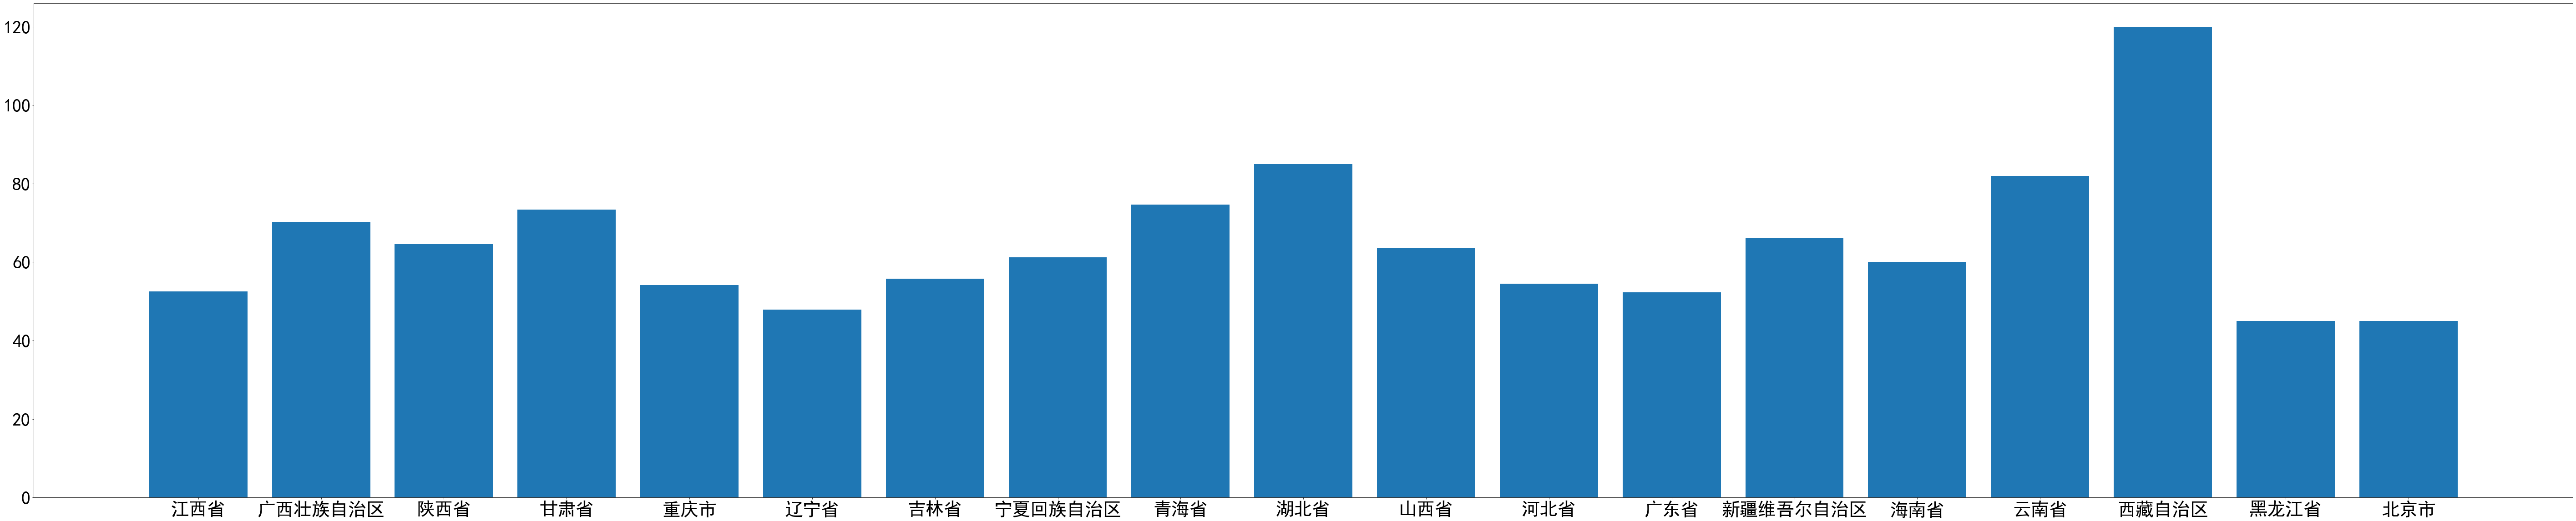

In [146]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(100,20))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.bar(province_sum_df[0], province_sum_df[1])
plt.show()

In [134]:
province_count

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]